<a href="https://colab.research.google.com/github/chandhru17/SentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic regression

Accuracy: 0.86
Precision: 0.83
Recall: 0.92
F1 Score: 0.87


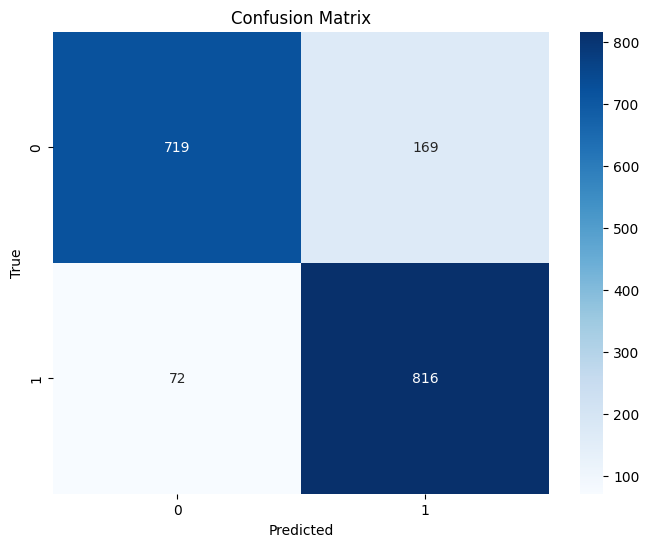

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = "amazon.csv"
df = pd.read_csv(dataset_path)

X = df['reviewText']
y = (df['overall'] > 3).astype(int)

X = X.fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

y_pred_adjusted = model.predict(X_test_resampled)

accuracy = accuracy_score(y_test_resampled, y_pred_adjusted)
precision = precision_score(y_test_resampled, y_pred_adjusted)
recall = recall_score(y_test_resampled, y_pred_adjusted)
f1 = f1_score(y_test_resampled, y_pred_adjusted)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test_resampled, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random forest

Accuracy: 0.87
Precision: 0.84
Recall: 0.93
F1 Score: 0.88


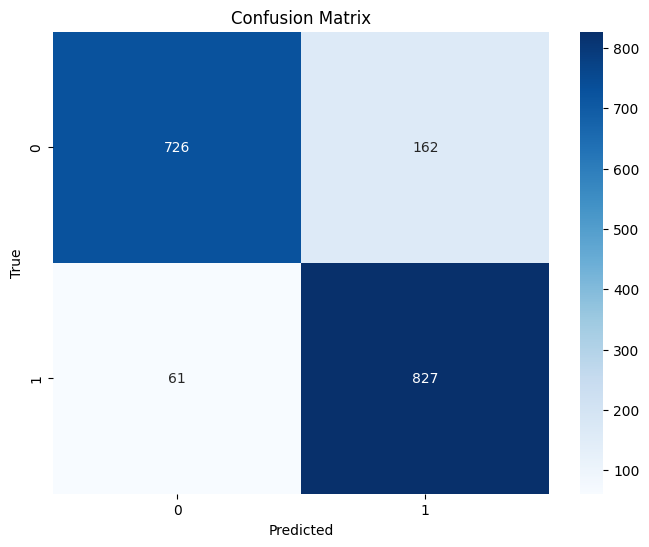

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = "amazon.csv"
df = pd.read_csv(dataset_path)

X = df['reviewText']
y = (df['overall'] > 3).astype(int)

X = X.fillna('')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

ros_train = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros_train.fit_resample(X_train_tfidf, y_train)

ros_test = RandomOverSampler(random_state=42)
X_test_resampled, y_test_resampled = ros_test.fit_resample(X_test_tfidf, y_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]

threshold = 0.7
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

accuracy = accuracy_score(y_test_resampled, y_pred_adjusted)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test_resampled, y_pred_adjusted)
recall = recall_score(y_test_resampled, y_pred_adjusted)
f1 = f1_score(y_test_resampled, y_pred_adjusted)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test_resampled, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Support vector machines

Accuracy: 0.81
Precision: 0.76
Recall: 0.92
F1 Score: 0.83


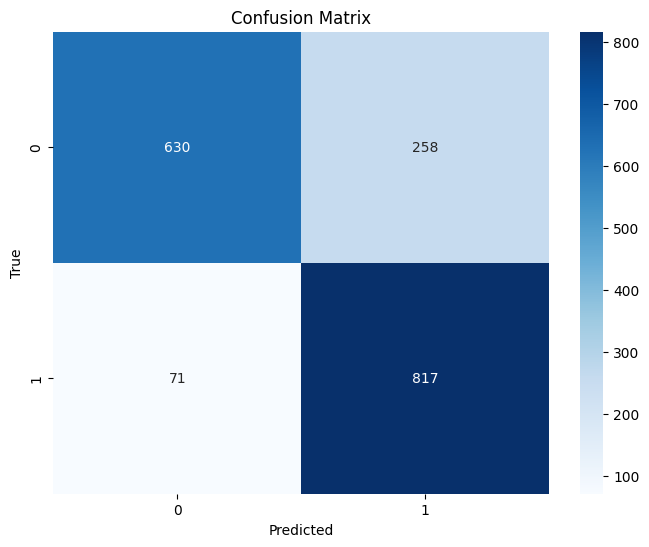

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = "amazon.csv"
df = pd.read_csv(dataset_path)

X = df['reviewText']
y = (df['overall'] > 3).astype(int)


X = X.fillna('')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

ros_train = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros_train.fit_resample(X_train_tfidf, y_train)

ros_test = RandomOverSampler(random_state=42)
X_test_resampled, y_test_resampled = ros_test.fit_resample(X_test_tfidf, y_test)

model = SVC(kernel='linear', C=1.0, probability=True)
model.fit(X_train_resampled, y_train_resampled)

y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]

threshold = 0.6
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

accuracy = accuracy_score(y_test_resampled, y_pred_adjusted)
precision = precision_score(y_test_resampled, y_pred_adjusted)
recall = recall_score(y_test_resampled, y_pred_adjusted)
f1 = f1_score(y_test_resampled, y_pred_adjusted)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test_resampled, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Decision Tree

Accuracy: 0.74
Precision: 0.67
Recall: 0.91
F1 Score: 0.78


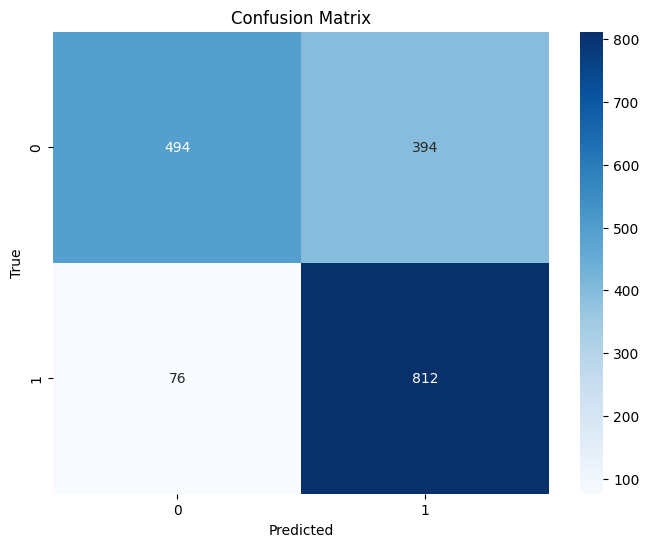

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = "amazon.csv"
df = pd.read_csv(dataset_path)

X = df['reviewText']
y = (df['overall'] > 3).astype(int)

X = X.fillna('')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

ros_train = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros_train.fit_resample(X_train_tfidf, y_train)

ros_test = RandomOverSampler(random_state=42)
X_test_resampled, y_test_resampled = ros_test.fit_resample(X_test_tfidf, y_test)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]

threshold = 0.6
y_pred_adjusted = (y_pred_prob > threshold).astype(int)


accuracy = accuracy_score(y_test_resampled, y_pred_adjusted)
precision = precision_score(y_test_resampled, y_pred_adjusted)
recall = recall_score(y_test_resampled, y_pred_adjusted)
f1 = f1_score(y_test_resampled, y_pred_adjusted)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test_resampled, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Naive bayes

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


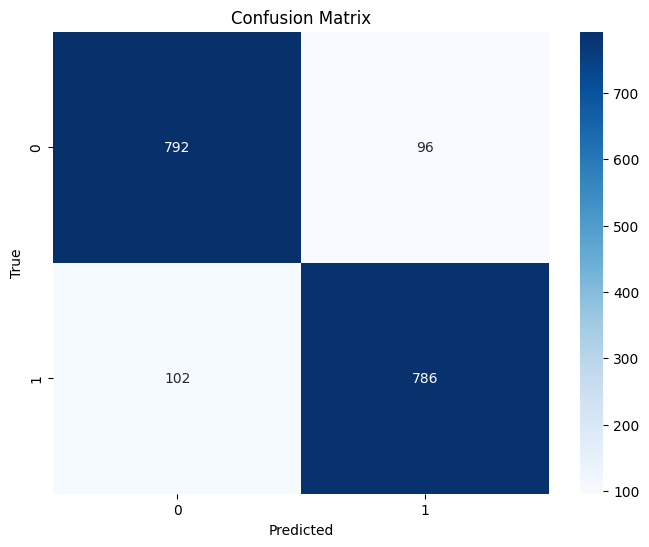

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dataset_path = "amazon.csv"
df = pd.read_csv(dataset_path)


X = df['reviewText']
y = (df['overall'] > 3).astype(int)


X = X.fillna('')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


ros_train = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros_train.fit_resample(X_train_tfidf, y_train)


ros_test = RandomOverSampler(random_state=42)
X_test_resampled, y_test_resampled = ros_test.fit_resample(X_test_tfidf, y_test)


model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test_resampled)

accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred)
recall = recall_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
